<a href="https://colab.research.google.com/github/FahruddinZaimIbrahim/PCVK_Ganjil_2024/blob/main/Jobsheet_7_Digital_Image_and_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

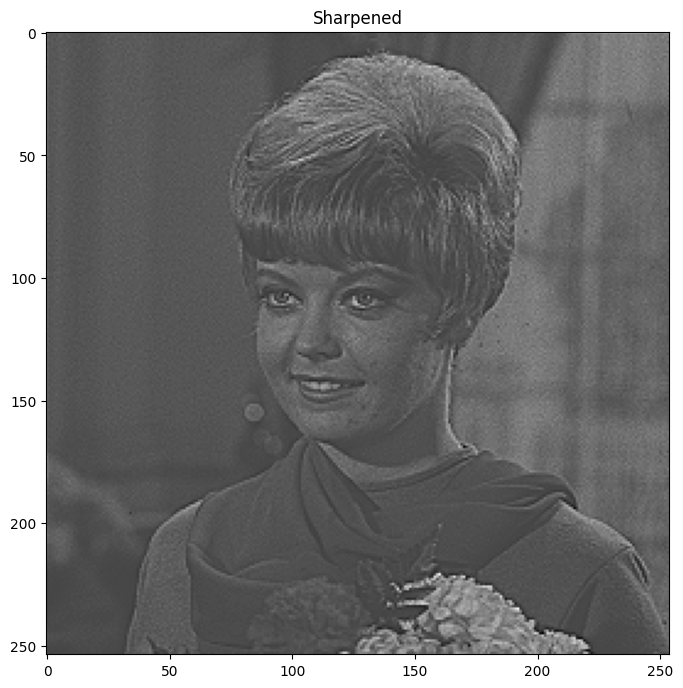

In [26]:
def convolution2d(image, kernel, stride=1, padding=0):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    output_height = int((image_height - kernel_height) / stride + 1)
    output_width = int((image_width - kernel_width) / stride + 1)

    output = np.zeros((output_height, output_width))

    for y in range(0, output_height):
        for x in range(0, output_width):
            window = image[y*stride:y*stride+kernel_height, x*stride:x*stride+kernel_width]
            output[y, x] = np.sum(window * kernel)

    return output

img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

img_sharpened = convolution2d(img_gray, kernel_sharpen, padding=1)

img_sharpened = cv.normalize(img_sharpened, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

plt.figure(figsize=(20, 15))
plt.subplot(232), plt.imshow(img_sharpened, cmap='gray'), plt.title('Sharpened')
plt.tight_layout()
plt.show()

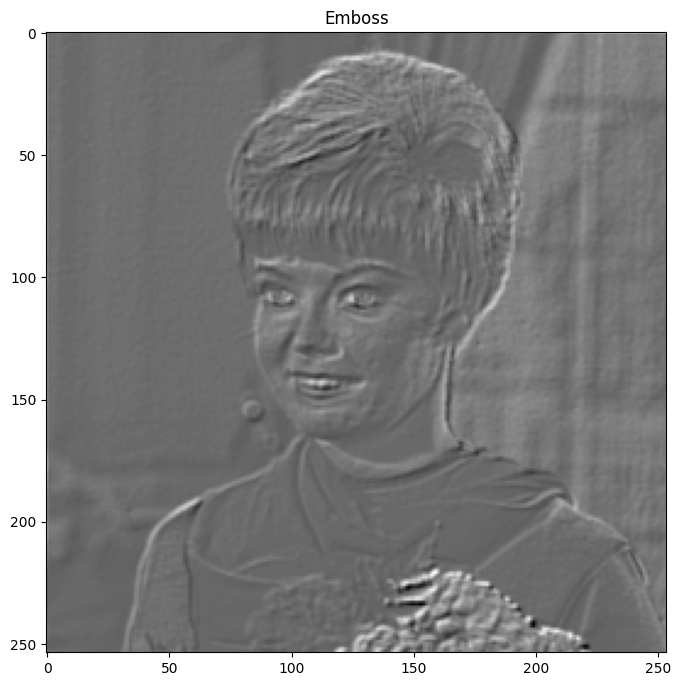

In [25]:
kernel_emboss = np.array([[-2, -1, 0],
                          [-1, 1, 1],
                          [0, 1, 2]])

img_emboss = convolution2d(img_gray, kernel_emboss, padding=1)
img_emboss = cv.normalize(img_emboss, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

plt.figure(figsize=(20, 15))
plt.subplot(233), plt.imshow(img_emboss, cmap='gray'), plt.title('Emboss')
plt.tight_layout()
plt.show()

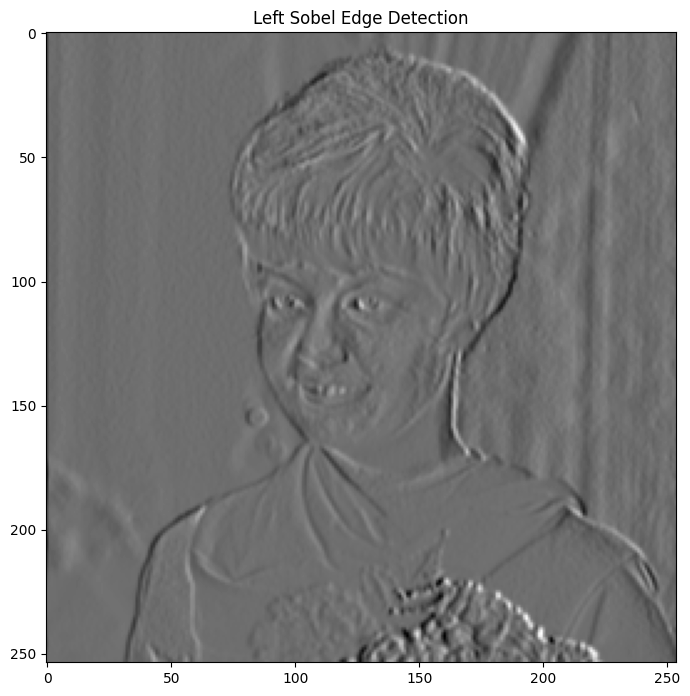

In [27]:
kernel_left_sobel = np.array([[1, 0, -1],
                              [2, 0, -2],
                              [1, 0, -1]])

img_left_sobel = convolution2d(img_gray, kernel_left_sobel, padding=1)
img_left_sobel = cv.normalize(img_left_sobel, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

plt.figure(figsize=(20, 15))
plt.subplot(234), plt.imshow(img_left_sobel, cmap='gray'), plt.title('Left Sobel Edge Detection')
plt.tight_layout()
plt.show()

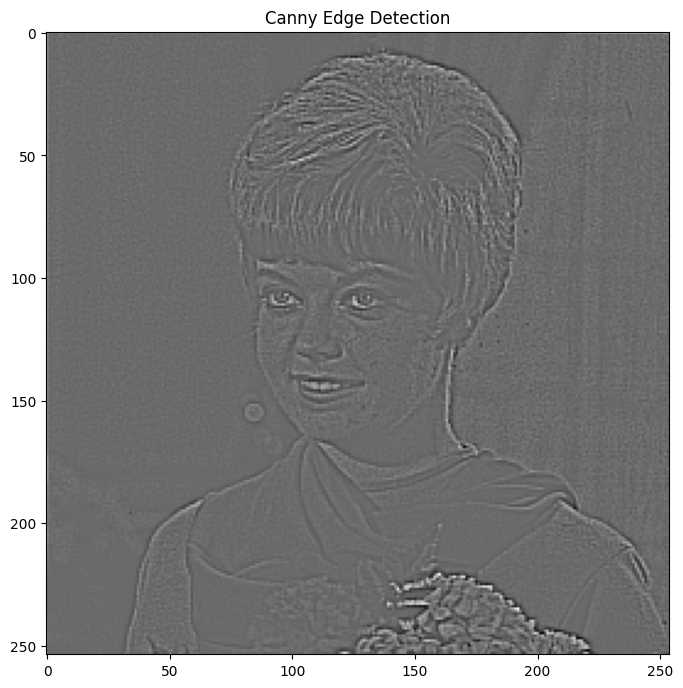

In [28]:
kernel_canny = np.array([[-1, -1, -1],
                         [-1, 8, -1],
                         [-1, -1, -1]])

img_canny = convolution2d(img_gray, kernel_canny, padding=1)
img_canny = cv.normalize(img_canny, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

plt.figure(figsize=(20, 15))
plt.subplot(235), plt.imshow(img_canny, cmap='gray'), plt.title('Canny Edge Detection')
plt.tight_layout()
plt.show()

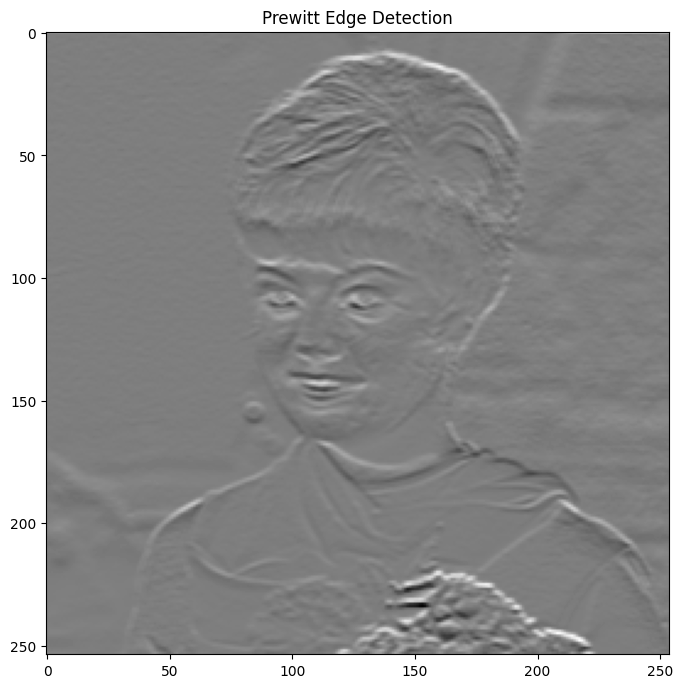

In [29]:
kernel_prewitt = np.array([[-1, -1, -1],
                           [0, 0, 0],
                           [1, 1, 1]])

img_prewitt = convolution2d(img_gray, kernel_prewitt, padding=1)

img_prewitt = cv.normalize(img_prewitt, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

plt.figure(figsize=(20, 15))
plt.subplot(232), plt.imshow(img_prewitt, cmap='gray'), plt.title('Prewitt Edge Detection')
plt.tight_layout()
plt.show()

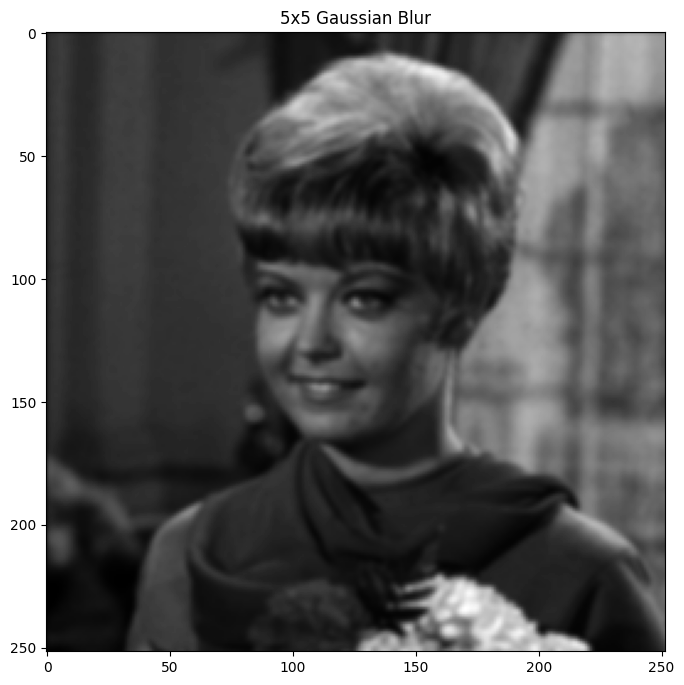

In [30]:
kernel_gaussian_5x5 = np.array([[1, 4, 6, 4, 1],
                                [4, 16, 24, 16, 4],
                                [6, 24, 36, 24, 6],
                                [4, 16, 24, 16, 4],
                                [1, 4, 6, 4, 1]]) / 256

img_gaussian_5x5 = convolution2d(img_gray, kernel_gaussian_5x5, padding=2)
img_gaussian_5x5 = cv.normalize(img_gaussian_5x5, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

plt.figure(figsize=(20, 15))
plt.subplot(233), plt.imshow(img_gaussian_5x5, cmap='gray'), plt.title('5x5 Gaussian Blur')
plt.tight_layout()
plt.show()

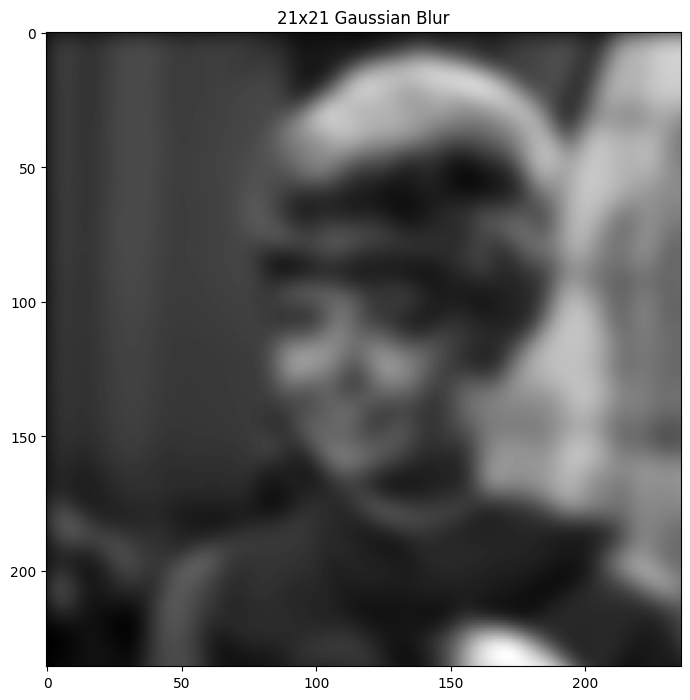

In [31]:
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
kernel_gaussian_21x21 = gaussian_kernel @ gaussian_kernel.T

img_gaussian_21x21 = convolution2d(img_gray, kernel_gaussian_21x21, padding=10)
img_gaussian_21x21 = cv.normalize(img_gaussian_21x21, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

plt.figure(figsize=(20, 15))
plt.subplot(234), plt.imshow(img_gaussian_21x21, cmap='gray'), plt.title('21x21 Gaussian Blur')
plt.tight_layout()
plt.show()